# Stats2-Probability distributions, random variables


This notebook illustrates the following concepts using simple scripts and functions from `Scipy` and `Numpy` packages.

- Random variables
- Central limit theorem
- Expected value
- Discrete probability distributions
- Concitinuous probability distributions
- Moments, variance, and other properties of probability distributions

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

---

## Random variable generation using `Numpy.random` module
Numpy offers an amazing module called `Numpy.random`, which has all the important probability distributions built-in for generation. We will check it out for,

- Normal
- Uniform


### Generate normally distributed numbers with various mean and std.dev
In `numpy.random.normal` method, the `loc` argument is the mean, adnd the `scale` argument is the std.dev

In [3]:
g1 = np.random.normal(loc=0,scale=np.sqrt(0.2),size=100000)

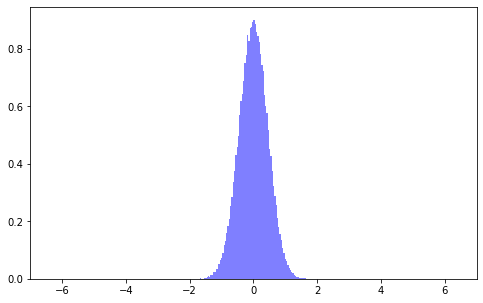

In [4]:
plt.figure(figsize=(8,5))
plt.hist(g1,density=True,bins=100,color='blue',alpha=0.5)
plt.xlim(-7,7)
plt.show()

### EXERCISE: 
- generate random samples from gaussians of means (0,0,-2) and variance (1,3,2) respectively
- plot the density with different colors

### Generate dice throws and average them to show the emergence of Normality as per the Central Limit Theorem
We can use either `np.random.uniform` or `np.random.randint` to generate dice throws uniformly randomly

In [51]:
np.random.uniform(low=1.0,high=7.0,size=10)

array([4.82410209, 6.98933133, 6.02069315, 5.56135199, 6.37788852,
       2.74708621, 1.42448256, 4.42000875, 6.2479585 , 3.84727738])

In [52]:
def dice_throws(num_sample):
    int_throws = np.vectorize(int)
    throws = int_throws(np.random.uniform(low=1.0,high=7.0,size=num_sample))
    return throws

In [53]:
dice_throws(5)

array([3, 2, 6, 1, 5])

In [54]:
np.random.randint(1,7,5)

array([5, 5, 4, 1, 1])

### EXERCISE: 
- generate 200 dice thorws and average them
- repeate the experience multiple times and plot the histogram of the average
- compute mean, std, skew, ecc of the different histogram

**QUESTION:** What do you notice?

In [55]:
num_exps_list = [50,100,500,1000,5000,10000,50000,100000]

## Expected value of a continuous function

__Expected value or mean__: the weighted average of the possible values, using their probabilities as their weights; or the continuous analog thereof.

Let $X$ be a random variable with a finite number of finite outcomes $x_1$,$x_2$,$x_3$,... occurring with probabilities $p_1$,$p_2$,$p_3$,... respectively. The expectation of $X$ is, then, defined as

$$ E[X]=\sum_{i=1}^{k}x_{i}\,p_{i}=x_{1}p_{1}+x_{2}p_{2}+\cdots +x_{k}p_{k} $$

Since, all the probabilities $p_1$, $p_2$, $p_3$, add up to 1, $p_1+p_2+p_3+...=1$, it is the **weighted average**.

For, continuous probability distributions, with a density function (PDF) of $f(x)$, the expected value is given by,

$$ {\displaystyle \operatorname {E} [X]=\int _{\mathbb {R} }xf(x)\,dx.}$$

### Let's calculate the expected value of the function $P(x)=x.e^{-x}$ between $x=0$ and $x=\infty$

We are trying to compute,
$$ \int _{0}^{\infty}x.P(x).dx = \int _{0}^{\infty}x.[x.e^{-x}].dx = \int _{0}^{\infty}x^2.e^{-x}.dx$$

In [8]:
def func(x):
    import numpy as np
    return x*np.exp(-x)

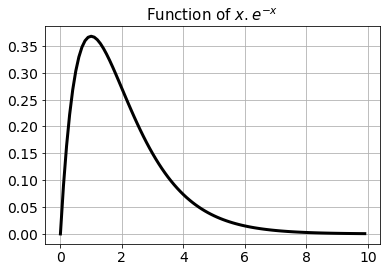

In [9]:
x = np.arange(0,10,0.1)
y = func(x)
plt.plot(x,y,color='k',lw=3)
plt.title("Function of $x.e^{-x}$",fontsize=15)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### Use `scipy.integrate` module
We will increase the upper limit of the integral slowly and show that the integral does not change much after a while.

In [10]:
import scipy.integrate

In [11]:
integral_value=[]
for i in range(1,11):
    integral=scipy.integrate.quad(func,0,i)[0]
    integral_value.append(integral)
    print("The integral value for upper limit of {} is : {}".format(i,integral))

The integral value for upper limit of 1 is : 0.2642411176571154
The integral value for upper limit of 2 is : 0.593994150290162
The integral value for upper limit of 3 is : 0.8008517265285442
The integral value for upper limit of 4 is : 0.9084218055563291
The integral value for upper limit of 5 is : 0.9595723180054871
The integral value for upper limit of 6 is : 0.9826487347633355
The integral value for upper limit of 7 is : 0.9927049442755638
The integral value for upper limit of 8 is : 0.9969808363488774
The integral value for upper limit of 9 is : 0.9987659019591333
The integral value for upper limit of 10 is : 0.9995006007726127


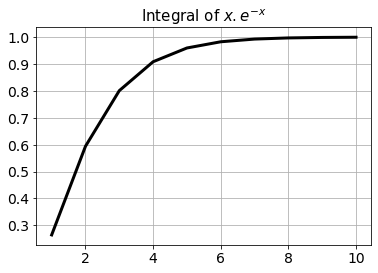

In [12]:
plt.plot(range(1,11),integral_value,color='k',lw=3)
plt.title("Integral of $x.e^{-x}$",fontsize=15)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [13]:
def expectation(x):
    return x*func(x)

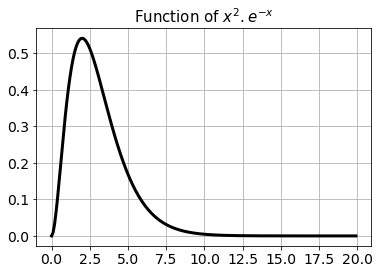

In [14]:
x = np.arange(0,20,0.1)
y = expectation(x)
plt.plot(x,y,color='k',lw=3)
plt.title("Function of $x^2.e^{-x}$",fontsize=15)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [15]:
integral_value=[]
for i in range(1,11):
    integral=scipy.integrate.quad(expectation,0,i)[0]
    integral_value.append(integral)
    print("The integral value for upper limit of {} is : {}".format(i,integral))

The integral value for upper limit of 1 is : 0.16060279414278839
The integral value for upper limit of 2 is : 0.6466471676338731
The integral value for upper limit of 3 is : 1.1536198377463132
The integral value for upper limit of 4 is : 1.5237933888929112
The integral value for upper limit of 5 is : 1.7506959610338377
The integral value for upper limit of 6 is : 1.8760623911666823
The integral value for upper limit of 7 is : 1.9407276722389566
The integral value for upper limit of 8 is : 1.972492064511994
The integral value for upper limit of 9 is : 1.9875356097872454
The integral value for upper limit of 10 is : 1.9944612085689766


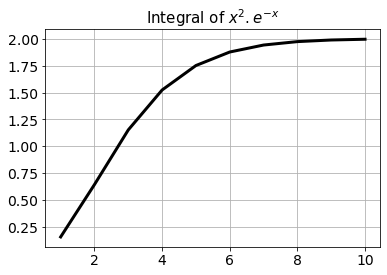

In [16]:
plt.plot(range(1,11),integral_value,color='k',lw=3)
plt.title("Integral of $x^2.e^{-x}$",fontsize=15)
plt.grid(True)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

---

## Discrete and Continuous Distributions

Probability distributions are generally divided into two classes. A __discrete probability distribution__ (applicable to the scenarios where the set of possible outcomes is discrete, such as a coin toss or a roll of dice) can be encoded by a discrete list of the probabilities of the outcomes, known as a [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function). 

On the other hand, a __continuous probability distribution__ (applicable to the scenarios where the set of possible outcomes can take on values in a continuous range (e.g. real numbers), such as the temperature on a given day) is typically described by probability density functions (with the probability of any individual outcome actually being 0). Such distributions are generally described with the help of [probability density functions](https://en.wikipedia.org/wiki/Probability_density_function).

### Some Essential Terminologies

* __Mode__: for a discrete random variable, the value with highest probability (the location at which the probability mass function has its peak); for a continuous random variable, a location at which the probability density function has a local peak.
* __Support__: the smallest closed set whose complement has probability zero.
* __Head__: the range of values where the pmf or pdf is relatively high.
* __Tail__: the complement of the head within the support; the large set of values where the pmf or pdf is relatively low.
* __Expected value or mean__: the weighted average of the possible values, using their probabilities as their weights; or the continuous analog thereof.
* __Median__: the value such that the set of values less than the median, and the set greater than the median, each have probabilities no greater than one-half.
* __Variance__: the second moment of the pmf or pdf about the mean; an important measure of the dispersion of the distribution.
* __Standard deviation__: the square root of the variance, and hence another measure of dispersion.

* __Symmetry__: a property of some distributions in which the portion of the distribution to the left of a specific value is a mirror image of the portion to its right.
* __Skewness__: a measure of the extent to which a pmf or pdf "leans" to one side of its mean. The third standardized moment of the distribution.
* __Kurtosis__: a measure of the "fatness" of the tails of a pmf or pdf. The fourth standardized moment of the distribution.

![kurtosis](https://anotherbloodybullshitblog.files.wordpress.com/2016/01/normal-not-always-the-norm.gif?w=809)

### Quick mathematical definitions of mean, variance, skewness, and kurtosis with respect to a PDF $P(x)$

$$\text{1st raw moment } \mathbf{Mean\ (1st\ moment):} \int x.P(x).dx$$

$$\text{Centralized 2nd moment } \mathbf{Variance\ (2nd\ moment):} \int (x-\mu)^2.P(x).dx$$

$$\text{Pearson's 3rd moment (Standardized) }\mathbf{Skew\ (3rd\ moment):} \int\left ( \frac{x-\mu}{\sigma} \right )^3.P(x).dx$$

$$\text{Pearson's 4th moment (Standardized)  }\mathbf{Kurtosis\ (4th\ moment):} \int\left ( \frac{x-\mu}{\sigma} \right )^4.P(x).dx$$

---

## Bernoulii distribution

The Bernoulli distribution, named after Swiss mathematician [Jacob Bernoulli](https://en.wikipedia.org/wiki/Jacob_Bernoulli), is the probability distribution of a random variable which takes the value 1 with probability $p$ and the value 0 with probability $q = 1 − p$ — i.e., the probability distribution of any single experiment that asks a ___yes–no question___; the question results in a boolean-valued outcome, a single bit of information whose value is success/yes/true/one with probability $p$ and failure/no/false/zero with probability $q$. 

It can be used to represent a coin toss where 1 and 0 would represent "head" and "tail" (or vice versa), respectively. In particular, unfair coins would have $p ≠ 0.5$.

The probability mass function $f$ of this distribution, over possible outcomes $k$, is

$${\displaystyle f(k;p)={\begin{cases}p&{\text{if }}k=1,\\[6pt]1-p&{\text{if }}k=0.\end{cases}}}$$

In [17]:
from scipy.stats import bernoulli

### Generate random variates

In [18]:
# p=0.5 i.e. fair coin
bernoulli.rvs(p=0.5,size=10)

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 0])

### Loaded coin towards tail, p=0.2 for head

In [19]:
# p=0.2 i.e. more tails (0) than heads(1)
bernoulli.rvs(p=0.2,size=20)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Loaded coin towards head, p=0.8 for head

In [20]:
# p=0.8 i.e. more heads (1) than tails (0)
bernoulli.rvs(p=0.8,size=20)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1])

### Note, a single run or even a small number of runs may not produce the expected distribution of 1's and 0's. 
For example, if you assign $p=0.5$, you may not get half 1's and half 0's every time you evaluate the function. Experiment with $N$ number of trials to see how the probability distribution gradually centers around 0.5.

### EXERCISE: Show that if you increase the number of trials the most likely value of p will converge to p=0.5

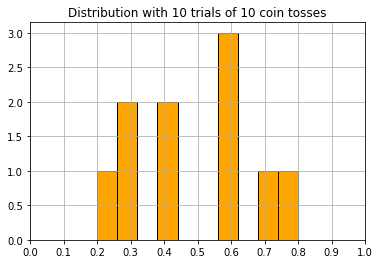

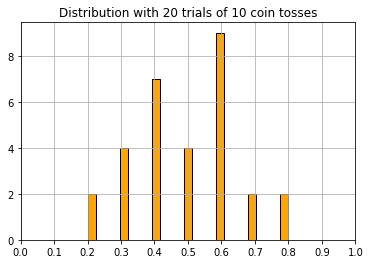

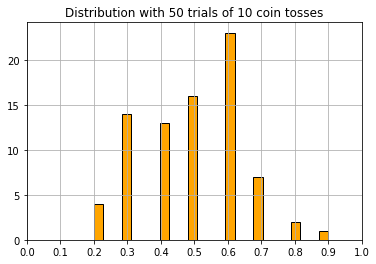

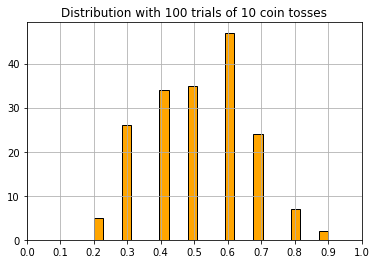

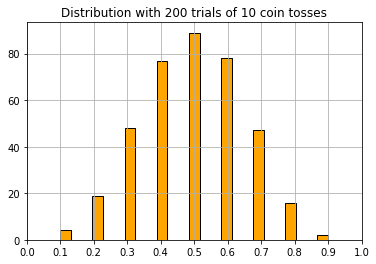

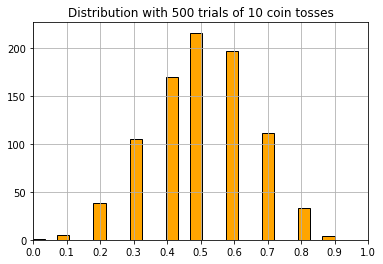

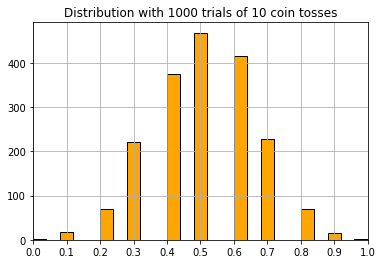

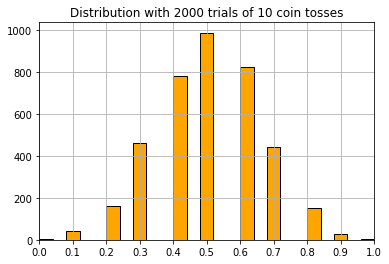

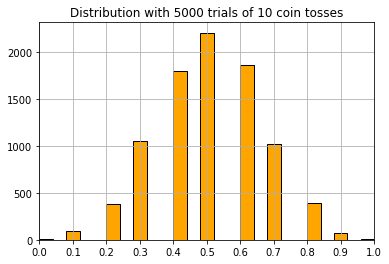

In [21]:
N_trials = [10,20,50,100,200,500,1000,2000,5000] # Number of trials


### Mean, variance, skew, and kurtosis
Use `bernoulli.stats()` method

In [22]:
print("A fair coin is spinning...\n"+"-"*30)
pr=0.5 # Fair coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)

A fair coin is spinning...
------------------------------
Mean: 0.5
Variance: 0.25
Skew: 0.0
Kurtosis: -2.0


In [23]:
print("\nNow a biased coin is spinning...\n"+"-"*35)
pr=0.7 # Biased coin toss probability
mean, var, skew, kurt = bernoulli.stats(p=pr, moments='mvsk')
print("Mean:",mean)
print("Variance:",var)
print("Skew:",skew)
print("Kurtosis:",kurt)


Now a biased coin is spinning...
-----------------------------------
Mean: 0.7
Variance: 0.21000000000000002
Skew: -0.8728715609439702
Kurtosis: -1.2380952380952361


### Probability mass function (PMF) and cumulative distribution function (CDF)

In [24]:
rv = bernoulli(0.6)
x=0
print("Probability mass function for {}: {}".format(x,rv.pmf(x)))
x=0.5
print("Probability mass function for {}: {}".format(x,rv.pmf(x)))
x=1.0
print("Probability mass function for {}: {}".format(x,rv.pmf(x)))
x=1.2
print("Probability mass function for {}: {}".format(x,rv.pmf(x)))

Probability mass function for 0: 0.4
Probability mass function for 0.5: 0.0
Probability mass function for 1.0: 0.6
Probability mass function for 1.2: 0.0


In [25]:
print("CDF for x < 0:",rv.cdf(-2))
print("CDF for 0< x <1:",rv.cdf(0.75))
print("CDF for x >1:",rv.cdf(2))

CDF for x < 0: 0.0
CDF for 0< x <1: 0.4
CDF for x >1: 1.0


## Normal (Gaussian) distribution

In probability theory, the normal (or Gaussian or Gauss or Laplace–Gauss) distribution is a very common continuous probability distribution. Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known. A random variable with a Gaussian distribution is said to be normally distributed and is called a normal deviate.

The normal distribution is useful because of the **[central limit theorem](https://en.wikipedia.org/wiki/Central_limit_theorem)**. In its most general form, under some conditions (which include finite variance), it states that **averages of samples of observations of random variables independently drawn from independent distributions converge in distribution to the normal**, that is, they become normally distributed when the number of observations is sufficiently large. 

Physical quantities that are expected to be the sum of many independent processes (such as measurement errors) often have distributions that are nearly normal. Moreover, many results and methods (such as propagation of uncertainty and least squares parameter fitting) can be derived analytically in explicit form when the relevant variables are normally distributed.

### PDF and CDF

The probability density function (PDF) is given by,
$$ f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}} $$
where,
- $\mu$ is the mean or expectation of the distribution (and also its median and mode),
- $\sigma$ is the standard deviation, and $\sigma^2$ is the variance.

Cumulative distribution function (CDF) is given by,
$$\frac{1}{2}\left [ 1+\text{erf} \left ( \frac{x-\mu}{\sigma\sqrt{2}}\right ) \right ]$$

![normal](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/normal.PNG)

Scipy Stats page: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm

In [45]:
from scipy.stats import norm

Text(0, 0.5, 'Probability Density')

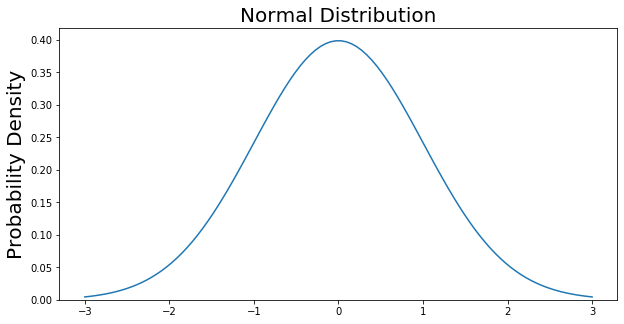

In [46]:
x = np.linspace(-3, 3, num = 100)
constant = 1.0 / np.sqrt(2*np.pi)
pdf_normal_distribution = constant * np.exp((-x**2) / 2.0)

fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(x, pdf_normal_distribution);
ax.set_ylim(0);
ax.set_title('Normal Distribution', size = 20);
ax.set_ylabel('Probability Density', size = 20)

### ESERCISE: derive the familiar 68-95-99.7 rule from the basic definition